In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os.path

#initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#twitter API Keys (load from untracked_api_key.txt)
with open('untracked_api_key_twitter.txt', 'r') as file_object:
    #Text document that is untracked in project-one directory (NOT pushed to git) with API key
    #Create a file called untracked_api_key.txt with your key and DO NOT add to git when commiting or pushing changes file_object.readline()
    consumer_key  = str(file_object.readline()).strip()
    consumer_secret = str(file_object.readline()).strip()
    access_token = str(file_object.readline()).strip()
    access_token_secret = str(file_object.readline()).strip()

#tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#target_user_list = ["@BBCNews", "@CBS", "@CNN", "@foxnews","@nytimes"]
target_user_list = ["@Quantstamp","@BTC","@Ripple","@ethereum","0xProject"]

sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for user in target_user_list:
        counter = 1
        #Obtain 100 recent tweets from home feed per user in target_user_list
        public_tweets = api.user_timeline(user, count = 100,result_type="recent")

        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments.append({"User":user,
                               "Date": tweet["created_at"], 
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
          
            # Add to counter 
            counter = counter + 1


In [18]:
#convert sentiment list into dataframe object
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#reorder columns in dataframe
sentiments_pd = sentiments_pd[['User','Date','Tweet','Tweets Ago','Compound','Negative','Neutral','Positive']]

sentiments_pd.head()

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
0,@Quantstamp,Tue Oct 09 03:55:19 +0000 2018,"RT @Fluence_One: Ed Zulkoski, Senior Security ...",1,0.6249,0.746,0.0,0.254
1,@Quantstamp,Tue Oct 09 02:56:27 +0000 2018,RT @golemproject: Full house at the @polychain...,2,0.0000,1.000,0.0,0.000
2,@Quantstamp,Mon Oct 08 16:22:05 +0000 2018,"Join us at @polychaincap for “Web3 stack, what...",3,0.6486,0.751,0.0,0.249
3,@Quantstamp,Mon Oct 08 16:19:14 +0000 2018,RT @golemproject: PSA! In #SFBW? Join us today...,4,0.3595,0.872,0.0,0.128
4,@Quantstamp,Mon Oct 08 00:33:52 +0000 2018,Our Community Manager @JaredHarrill announces ...,5,0.5859,0.725,0.0,0.275


In [17]:
sentiments_pd.tail()

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
495,0xProject,Mon Jun 25 17:29:11 +0000 2018,RT @ledgerdex: We are very excited to announce...,96,0.4561,0.885,0.00,0.115
496,0xProject,Fri Jun 22 19:22:09 +0000 2018,Please join us in welcoming Mel Oberto to the ...,97,0.8622,0.642,0.00,0.358
497,0xProject,Thu Jun 21 21:36:07 +0000 2018,@mihaithoracic @etherscan @ethplorer @RadarRel...,98,-0.3506,0.790,0.21,0.000
498,0xProject,Tue Jun 19 15:11:07 +0000 2018,RT @RadarRelay: The Radar Relay beta is comple...,99,0.0000,1.000,0.00,0.000
499,0xProject,Mon Jun 18 16:05:52 +0000 2018,RT @ledgerdex: LedgerDex is the next generatio...,100,0.2023,0.921,0.00,0.079


In [19]:
sentiments_pd.sample(20)

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
296,@Ripple,Tue Jul 31 16:03:06 +0000 2018,We're thrilled to announce @BillClinton as key...,97,0.4404,0.838,0.000,0.162
290,@Ripple,Wed Aug 08 20:04:21 +0000 2018,RT @JoelKatz: Want to see me discuss blockchai...,91,0.0772,0.951,0.000,0.049
84,@Quantstamp,Wed Aug 08 18:34:01 +0000 2018,Our writer Julian Martinez [ @jmartinez_43 ] r...,85,0.0000,1.000,0.000,0.000
430,0xProject,Tue Sep 18 16:30:19 +0000 2018,🚀 https://t.co/cdUU69hJKW,31,0.0000,1.000,0.000,0.000
439,0xProject,Fri Sep 07 10:16:22 +0000 2018,ETHBerlin 👋 \n\nCome find the 0x team at our b...,40,0.0000,1.000,0.000,0.000
48,@Quantstamp,Sat Sep 01 19:09:46 +0000 2018,@nucypher ♥️,49,0.0000,1.000,0.000,0.000
377,@ethereum,Fri Jun 02 23:21:04 +0000 2017,[Breaking]: Devcon3 registration is now open! ...,78,0.0000,1.000,0.000,0.000
288,@Ripple,Fri Aug 10 00:57:05 +0000 2018,“We’re working with early adopters like Cualli...,89,0.3612,0.889,0.000,0.111
95,@Quantstamp,Fri Aug 03 23:24:32 +0000 2018,"Getting ready for betanet, Korea Blockchain We...",96,0.3612,0.865,0.000,0.135
28,@Quantstamp,Mon Sep 10 08:07:14 +0000 2018,RT @wanchain_org: Excited to announce Wanchain...,29,0.7257,0.767,0.000,0.233


In [6]:
# save sentiment data to csv
sentiments_pd.to_csv("TwitterMoodSentiment.csv")

In [7]:
sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#sentiments_pd_grouped.count().head()
#for user in sentiments_pd_grouped["User"]:
#plt.scatter(sentiments_pd_grouped["Tweets Ago"],sentiments_pd_grouped["Compound"])
#plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
#plt.legend(sentiments_pd["User"])
#plt.ylabel("Tweet Polarity")
#plt.xlabel("Tweets Ago")
#plt.show()

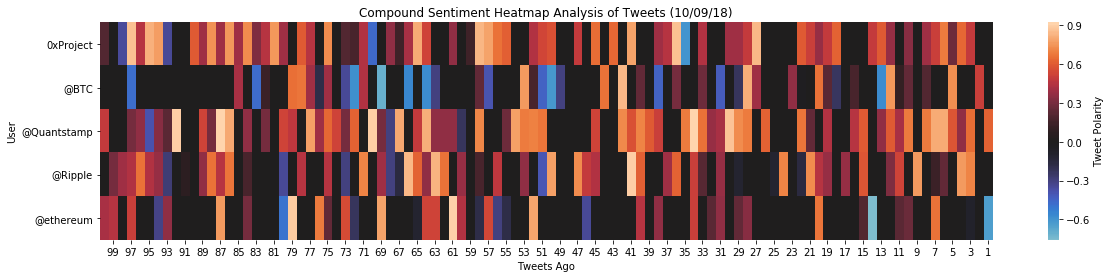

In [8]:
# Compound sentiment heatmap

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 20,4
plt.title("Compound Sentiment Heatmap Analysis of Tweets (%s)" % (time.strftime("%x")))
sentiments_pd_p = sentiments_pd.pivot("User", "Tweets Ago", "Compound")
ax = sns.heatmap(sentiments_pd_p, center = 0,  cbar_kws={'label': 'Tweet Polarity'})
ax.invert_xaxis()

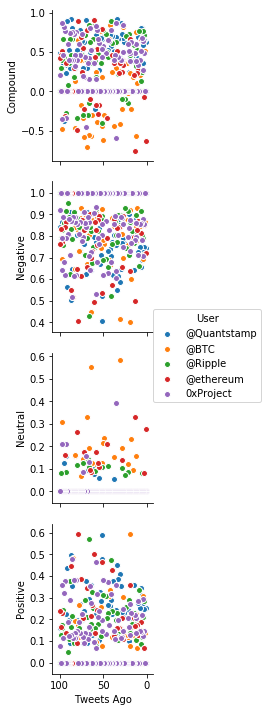

In [9]:
sns.pairplot(sentiments_pd, hue="User", x_vars=["Tweets Ago"],y_vars=["Compound","Negative","Neutral", "Positive"])
#ax.set_visible(False)

#g = sns.pairplot(sentiments_pd, hue="User",vars = ["Compound","Negative","Tweets Ago", "Positive"])
#for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    #g.axes[i, j].set_visible(False)
plt.gca().invert_xaxis()
plt.show()

In [10]:
#sns.jointplot(sentiments_pd["Tweets Ago"], sentiments_pd["Compound","Neutral"], kind="hex")

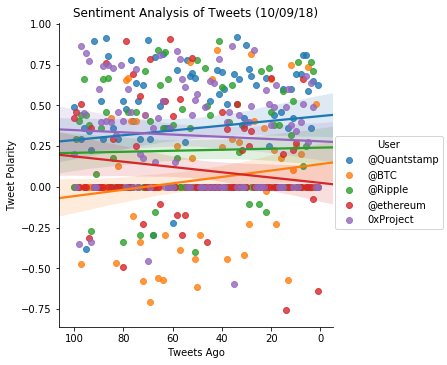

In [11]:
sns.lmplot("Tweets Ago", "Compound", data=sentiments_pd, hue='User', fit_reg=True)
plt.title("Sentiment Analysis of Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.gca().invert_xaxis()
plt.savefig("general_tweet_sentiment_scatter")
plt.show()

In [12]:
#sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#color=["lightblue", 'green', 'red', 'blue', 'gold']
#plt.bar(sentiments_pd['User'], sentiments_pd['Compound'],color=["lightblue", 'green', 'red', 'blue', 'gold'])
#plt.title("Overall Media Sentiment of Tweets (%s)" % (time.strftime("%x")))
#plt.ylabel("Tweet Polarity")
#plt.xlabel("User Account")
#plt.legend(['Compound','Negative','Neutral','Positive'])
#color=["lightblue", 'green', 'red', 'blue', 'gold']
#sentiments_pd[['Compound','Negative','Neutral','Positive']]
#plt.legend()
#plt.savefig("overall_tweet_sentiment_bar")
#plt.show()

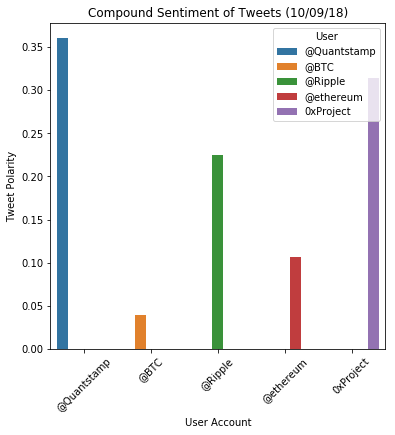

In [13]:
rcParams['figure.figsize'] = 6,6
sns.barplot("User", "Compound", data=sentiments_pd, hue='User',ci=None)
plt.title("Compound Sentiment of Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("User Account")
plt.xticks(rotation=45)
plt.savefig("compound_tweet_sentiment_bar")
plt.show()